# Analysis of TG-NDA and NDA Agreement

In [2]:
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import pandas as pd

from gallo.formulations.nda import NDA
from gallo.formulations.saaf import SAAF
from gallo.formulations.diffusion import Diffusion
from gallo.fe import *
from gallo.materials import Materials
from gallo.problem import Problem
from gallo.plot import plot, plot_1d
from gallo.solvers import Solver

Difference between TG-NDA and NDA for one material problem shown in MRZ Master's Thesis. 

In [21]:
nda_moderator_flux = np.loadtxt('comparison_data/nda_moderator')
tgnda_moderator_flux = np.loadtxt('comparison_data/tgnda_moderator')
rel = []
for g in range(7):
    rel.append(np.abs(nda_moderator_flux[g] - tgnda_moderator_flux[g])/np.max(np.abs(nda_moderator_flux[g])))

In [3]:
dfs = []
for g in range(7):
    tmp = pd.DataFrame(rel[g], columns=["rel_err"])
    tmp["group"]=g+1
    dfs.append(tmp)
    
df = pd.concat(dfs)

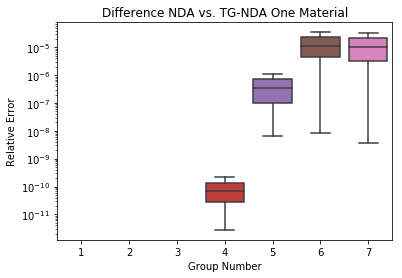

In [17]:
g = sns.boxplot(data=df, x="group", y="rel_err")
plt.ylabel("Relative Error")
plt.xlabel("Group Number")
plt.ticklabel_format(style='sci', axis='y', useMathText=True, scilimits=(0,1))
plt.title("Difference NDA vs. TG-NDA One Material")
g.set_yscale('log')

In [22]:
nda_iron_water_flux = np.loadtxt('comparison_data/nda_iron-water')
tgnda_iron_water_flux = np.loadtxt('comparison_data/tgnda_iron-water')
rel_iw = []
for g in range(7):
    rel_iw.append(np.abs(nda_iron_water_flux[g] - tgnda_iron_water_flux[g])/np.max(np.abs(nda_iron_water_flux[g])))
dfs_iw = []
for g in range(7):
    tmp = pd.DataFrame(rel_iw[g], columns=["rel_err"])
    tmp["group"]=g+1
    dfs_iw.append(tmp)
    
df_iw = pd.concat(dfs_iw)

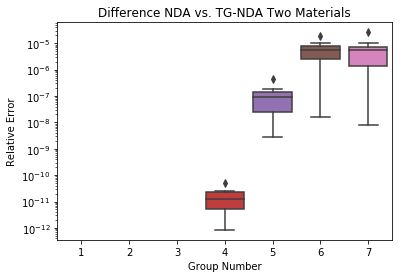

In [23]:
h = sns.boxplot(data=df_iw, x="group", y="rel_err")
plt.ylabel("Relative Error")
plt.xlabel("Group Number")
plt.ticklabel_format(style='sci', axis='y', useMathText=True, scilimits=(0,1))
plt.title("Difference NDA vs. TG-NDA Two Materials")
h.set_yscale('log')

In [4]:
nda_3materials = np.loadtxt('comparison_data/nda_3materials')
tgnda_3materials = np.loadtxt('comparison_data/tgnda_3materials')
rel_iw = []
for g in range(7):
    rel_iw.append(np.abs(nda_3materials[g] - tgnda_3materials[g])/np.max(np.abs(nda_3materials[g])))
dfs_iw = []
for g in range(7):
    tmp = pd.DataFrame(rel_iw[g], columns=["rel_err"])
    tmp["group"]=g+1
    dfs_iw.append(tmp)
    
df_iw = pd.concat(dfs_iw)

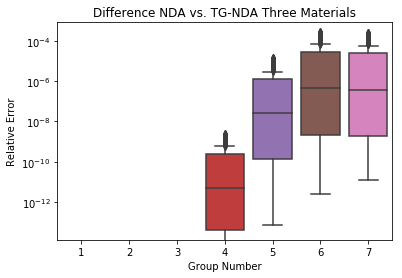

In [5]:
j = sns.boxplot(data=df_iw, x="group", y="rel_err")
plt.ylabel("Relative Error")
plt.xlabel("Group Number")
plt.ticklabel_format(style='sci', axis='y', useMathText=True, scilimits=(0,1))
plt.title("Difference NDA vs. TG-NDA Three Materials")
j.set_yscale('log')